IMPORTATO IL FILE CON 130K RIGHE.

Come prima fase faremo l'EDA, per cui esploreremo il dataset al fine di rilevare informazioni utili, insieme al data cleaning del dataset.
Come seconda fase proveremo a rispondere alle seguenti domande:
    1. Varietà di vino e cantine più apprezzate
    2. Se ci sono outlier di prezzo
    3. Se ci sono correlazioni tra variabili
    
Infine, si potrà mostrare un output in cui indicare una strategia su cui puntare per fornire il miglior assortimento per un nuovo marketplace di vini

## INIZIO FASE 1 - EDA e DATA CLEANING ##
Dopo la lettura e quindi importazione del csv, procedo con l'EDA e il data cleaning in modo da arrivare ad un dataset pronto per essere usato per
estrarre le informazioni utili

In [ ]:
# Importo la libreria pandas assegnando l'alias 'pd', che è l'alias usato convenzionalmente
import pandas as pd

# Grazie a pandas, leggo il csv creando un dataframe (df)
df = pd.read_csv('winemag-data-130k-v2.csv')

# Il metodo head() di default restituisce 5 righe del dataset. Specificando un numero intero in parentesi indichiamo quante rows restituire.
# Dunque, è di buon uso per dare uno sguardo al dataset
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
# Si può notare una colonna in eccesso, Unnamed:0, che andremo ad eliminare
# l'istruzione seguente elimina la colonna Unnamed: 0, l'attributo axis=1 specifica che si tratta
# di colonna e non riga (per la quale sarebbe stato axis=0)
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [ ]:
# Con il metodo .info() è possibile notare le colonne contenenti valori numerici, oltre a capire se ci sono valori nulli e in quali colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
# Queste colonne sono conseguenti del metodo .describe() che le usa per restituire informazioni statistiche di base
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [ ]:
# Dalle info ricavate dal metodo .describe() è possibile notare come ci siano alcuni valori della colonna PRICE non valorizzati (il COUNT non arriva al numero
# di righe di 129971, quest'ultimo valore ricavabile con df.shape. Possiamo verificare con un'istruzione specifica quante ne mancano.
# Poi sostituiremo il valore nullo

In [ ]:
# La seguente istruzione conta i valori nulli per ogni colonna. la colonna PRICE ne ha 8996.
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Possiamo evincere dalla seguente riga di codice (visualizzate solo le prime 5) il price medio per ogni categoria points, ovvero quali valori
# Andrò a riempire nella colonna price, basandomi per categoria di points
df.groupby(["points"]).mean().round(0).head()

<ipython-input-17-c89bb592515b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["points"]).mean().round(0).head()


,price
points,
80,16.0
81,17.0
82,19.0
83,18.0
84,19.0


In [ ]:
# Calcola la media di prezzo per ogni valore della colonna 'points'
media_per_categoria = df.groupby('points')['price'].transform('mean')

# Riempie i valori nulli in 'price' con la media del rispettivo gruppo
df['price'] = df['price'].fillna(media_per_categoria).round(0)

# Verifico che le istruzioni precedenti non abbia lasciato campi nulli per la colonna price
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Ora procederemo a pulire la colonna country. Con la seguente istruzione seleziono solo le righe che hanno il valore NULL nella colonna COUNTRY
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,18.0,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [ ]:
# Il dataset risultante mostra come le righe con COUNTRY a NULL hanno anche i campi PROVINCE, REGION_1, REGION_2 sono a NULL. Considerando che
# stiamo parlando di sole 63 rows su un totale di oltre 129mila, procedo con l'eliminazione di queste 63
# con l'attributo inplace a True, inoltre, si fa in modo che la modifica agisca sullo stesso DataFrame
df.dropna(subset=['country'],inplace=True)

In [ ]:
# Rieseguendo l'istruzione possiamo verificare i dati su cui potremmo ancora intervenire
df.isna().sum()

country                      0
description                  0
designation              37454
points                       0
price                        0
province                     0
region_1                 21184
region_2                 79397
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
# Procediamo con la gestione dei valori nulli. Abbiamo una sola riga per il campo VARIETY nulla, la andremo ad eliminare
df.dropna(subset=['variety'], inplace=True)

In [ ]:
# Rieseguiamo nuovamente per verificare se possiamo ancora intervenire
df.isna().sum()

country                      0
description                  0
designation              37453
points                       0
price                        0
province                     0
region_1                 21183
region_2                 79396
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
dtype: int64

In [ ]:
# Possiamo notare come il campo REGION_2 ha molti valori nulli, quasi la metà e, notando a campione, si evince che, quando valorizzato, sia uguale al valore
# corrispettivo REGION_1. Procederemo dunque ad eliminare questa colonna poichè non utile ai fini dell'analisi
df.drop("region_2", axis="columns", inplace=True)

KeyError: ignored

In [ ]:
# Possiamo ora verificare che tutto il dataset sia pronto per l'analisi
df.isna().sum()

country                      0
description                  0
designation              37453
points                       0
price                        0
province                     0
region_1                 21183
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
dtype: int64

## FINE FASE 1 - EDA e DATA CLEANING ##
ABBIAMO SISTEMATO TUTTI I VALORI VUOTI IN CAMPI CHIAVE. Rimangono valori vuoti nei campi Designation, Region_1, Taster_name e Taster_twitter_handle
perchè li considero non utili ad alcun tipo di analisi se non vedere ad esempio quali assaggiatori non hanno un account twitter o quali vini non hanno alcun assaggiatore professionista.

## INIZIO FASE 2 ##
a questo punto risponderemo alle domande seguenti:

1. Varietà di vino e cantine più apprezzate
2. Se ci sono outlier di prezzo
3. Se ci sono correlazioni tra variabili

In [ ]:
# Eseguo .head() per avere una rapida panoramica del dataset
df.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


1. VARIETA' DI VINO E CANTINE PIU' APPREZZATE

In [ ]:
# Per trovare le varietà di vino più apprezzate possiamo calcolare la media del punteggio, dopo aver raggruppato per title.
# Considereremo solo le varietà che si presentano più di 5 volte in modo tale da escludere quelle con medie poco accurate causate dalla bassa frequenza nel dataset dei vini
# Ordineremo il risultato in ordine decrescente, visualizzando poi solo le 5 più apprezzate
df.groupby('title').agg(['mean','count'])['points'].reset_index().sort_values(by='mean', ascending=False).round(1).query('count>5').head()

<ipython-input-28-e20076106d8d>:4: FutureWarning: ['country', 'description', 'designation', 'province', 'region_1', 'taster_name', 'taster_twitter_handle', 'variety', 'winery'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('title').agg(['mean','count'])['points'].reset_index().sort_values(by='mean', ascending=False).round(1).query('count>5').head()


,title,mean,count
6656,Bailly-Lapierre NV Brut (Crémant de Bourgogne),90.3,6
93880,Ruinart NV Brut Rosé (Champagne),89.7,7
51640,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,89.0,11
11619,Boizel NV Brut Réserve (Champagne),88.7,6
78204,Mumm Napa NV Brut Prestige Sparkling (Napa Val...,88.3,6


In [ ]:
# Per ottenere le cantine più apprezzate creo una variabile che rappresenta la mediana delle occorrenze di cantine nel dataset.
# La mediana la ricerco tuttavia escludendo quelli con conteggio minore o uguale a 20, poichè il dataset è composto da molti valori con conteggio = 1
df_median = df.groupby('winery').size().reset_index().rename(columns={0:"conteggio"}).sort_values(by='conteggio', ascending=False).query('conteggio>20')

# Creo la variabile che rappresenta la mediana
mediana_per_filtro = df_median['conteggio'].median()

# Raggruppo per cantina (winery) con funzioni di aggregazione media e conteggio e seleziono solo i record che hanno conteggio superiore al valore della variabile mediana_per_filtro, per considerare
# solo le cantine ricorrenti un sufficiente numero di volte
df.groupby('winery').agg(['mean','count'])['points'].reset_index().sort_values(by='mean', ascending=False).round(1).query(f'count>{mediana_per_filtro}').head()

<ipython-input-29-a1ec7177bab1>:9: FutureWarning: ['country', 'description', 'designation', 'province', 'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('winery').agg(['mean','count'])['points'].reset_index().sort_values(by='mean', ascending=False).round(1).query(f'count>{mediana_per_filtro}').head()


,winery,mean,count
2675,Cayuse,93.9,81
10239,Louis Roederer,93.3,45
7090,F X Pichler,93.1,37
6918,Emmerich Knoll,92.9,43
1224,Betz Family,92.9,53


2. VERIFICA OUTLIER DI PREZZO

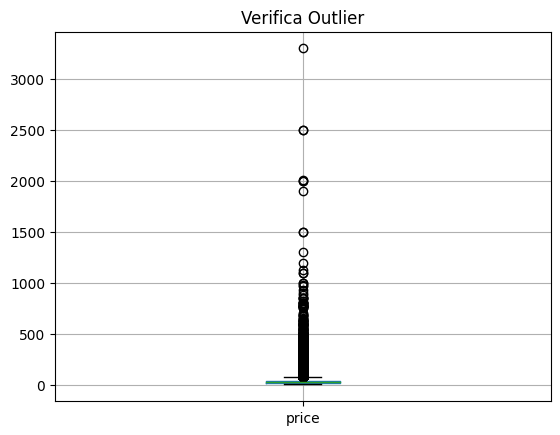

In [ ]:
# Importiamo la libreria matplotlib e il suo modulo pyplot con alias plt
import matplotlib.pyplot as plt

# Creiamo il grafico boxplot relativo alla colonna price
df.boxplot(column='price')

# Diamo al grafico un nome
plt.title("Verifica Outlier")

# Con l'istruzione show() potremo visualizzarlo a video
plt.show()

In [ ]:
# Raggruppa per due colonne e calcola conteggio, media e la deviazione standard per ogni gruppo, resettando gli indici
stats_per_categoria = df.groupby(['title','variety'])['price'].agg(['count','mean', 'std']).reset_index()

# Creiamo un secondo dataframe, df_stats, con rows che abbiano sostanzialmente la deviazione standard valorizzata
df_stats = stats_per_categoria.query('std>0').sort_values(by='std', ascending=False)

# Vediamo le prime 5 righe del dataframe df_stats
df_stats.head().round(1)

,title,variety,count,mean,std
52256,Gosset 1998 Celebris Vintage Extra Brut (Cham...,Champagne Blend,2,106.5,61.5
63331,Krug NV Brut Rosé (Champagne),Champagne Blend,3,329.7,61.1
82601,Pannier NV Rosé Velours Sec (Champagne),Champagne Blend,2,64.0,49.5
76024,Michele Satta 2007 I Castagni (Bolgheri Super...,Red Blend,2,85.5,48.8
41195,Drappier 2000 Grande Sendrée Brut (Champagne),Champagne Blend,2,68.0,43.8


In [ ]:
# Creiamo un nuovo dataframe unendo i dataframe df e df_stats per i campi title e variety
df_merged = pd.merge(df,df_stats, on = ['title','variety'])

# Vediamo le prime 5 righe del nuovo dataframe
df_merged.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,count,mean,std
0,US,"This blend of Sangiovese, Malbec, Cabernet Sau...",Siena,88,23.0,California,Sonoma County,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,2,22.0,1.414214
1,US,"This is made from a majority of Sangiovese, wi...",Siena,87,21.0,California,Sonoma County,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,2,22.0,1.414214
2,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,2,13.0,2.828427
3,Italy,There are interesting aromatic layers here tha...,Extra Dry,86,11.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,2,13.0,2.828427
4,Italy,"There's a unique note here of mature fruit, ch...",Arió Extra Dry,86,15.0,Veneto,Prosecco di Conegliano,NaN,NaN,L'Antica Quercia 2007 Arió Extra Dry (Prosecc...,Prosecco,L'Antica Quercia,2,16.5,2.121320


In [ ]:
# Con il metodo insert aggiungo colonna Check_Outlier all'ultima posizione che andrò poi ad aggiornare in base a specifici criteri
df_merged.insert(df_merged.shape[1], "Check_Outlier", 0)

# Verifico la corretta esecuzione dell'istruzione precedente
df_merged.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,count,mean,std,Check_Outlier
0,US,"This blend of Sangiovese, Malbec, Cabernet Sau...",Siena,88,23.0,California,Sonoma County,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,2,22.0,1.414214,0
1,US,"This is made from a majority of Sangiovese, wi...",Siena,87,21.0,California,Sonoma County,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,2,22.0,1.414214,0
2,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,2,13.0,2.828427,0
3,Italy,There are interesting aromatic layers here tha...,Extra Dry,86,11.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,2,13.0,2.828427,0
4,Italy,"There's a unique note here of mature fruit, ch...",Arió Extra Dry,86,15.0,Veneto,Prosecco di Conegliano,NaN,NaN,L'Antica Quercia 2007 Arió Extra Dry (Prosecc...,Prosecco,L'Antica Quercia,2,16.5,2.121320,0


In [ ]:
# Effettuo un ciclo for che itera su ogni row del dataset. Andremo a verificare se ci sono valori che discostano anche di una sola deviazione
# standard (ho scelto solo 1 deviazione poichè con due non troverei alcun outlier).
# Per quei valori che soddisferanno la condizione setterò il nuovo campo Check_Outlier a 1

for index in range(len(df_merged)):
                   if ((df_merged['price'][index] < (df_merged['mean'][index] - df_merged['std'][index])) | (df_merged['price'][index] > (df_merged['mean'][index] + df_merged['std'][index]))):
                        df_merged['Check_Outlier'][index] = 1

<ipython-input-35-8c19fffeb09c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Check_Outlier'][index] = 1


In [ ]:
# Verifico quanti outlier sono stati trovati
df_merged['Check_Outlier'].value_counts()

0    1016
1     170
Name: Check_Outlier, dtype: int64

In [ ]:
# Con il metodo query estraggo e ottengo il dataset composto da tutti gli outlier di prezzo, voglio però visualizzare solo le prime 5 occorrenze
df_merged.query('Check_Outlier == 1').head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,count,mean,std,Check_Outlier
13,France,The style of Jacquart's nonvintage Champagne i...,Brut Mosaïque,87,25.0,Champagne,Champagne,Roger Voss,@vossroger,Jacquart NV Brut Mosaïque (Champagne),Champagne Blend,Jacquart,6,34.166667,6.645801,1
17,US,This bubbly brings a rich buttery Chardonnay f...,Brut,89,24.0,California,Anderson Valley,Jim Gordon,@gordone_cellars,Roederer Estate NV Brut Sparkling (Anderson Va...,Sparkling Blend,Roederer Estate,3,23.333333,0.577350,1
21,Austria,"That herbal, yeasty tang of Grüner is on displ...",NaN,89,18.0,Kamptal,NaN,Anne Krebiehl MW,@AnneInVino,Steininger 2016 Grüner Veltliner (Kamptal),Grüner Veltliner,Steininger,3,17.333333,0.577350,1
24,Portugal,"This mature wine has a soft, smooth character ...",VT '08,90,32.0,Douro,NaN,Roger Voss,@vossroger,Quinta do Sagrado 2008 VT '08 Red (Douro),Portuguese Red,Quinta do Sagrado,3,42.000000,8.660254,1
28,Portugal,This is a sweet sparkling wine that's based ar...,Casal Garcia Rosé,84,11.0,Vinho Verde,NaN,Roger Voss,@vossroger,Aveleda NV Casal Garcia Rosé Sparkling (Vinho ...,Portuguese Sparkling,Aveleda,3,11.666667,0.577350,1


In [ ]:
3. VERIFICA CORRELAZIONI

<ipython-input-41-407660e56bd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-41-407660e56bd0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heatmap = df.corr()


<Axes: >

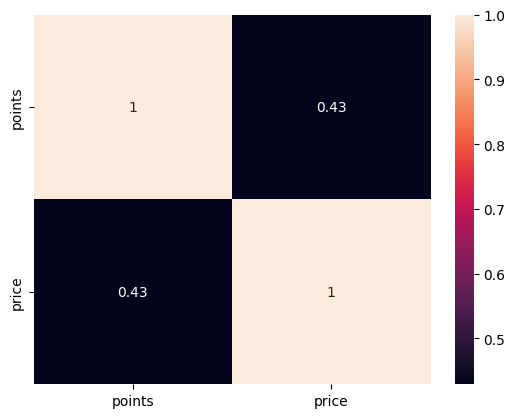

In [ ]:
# Per avere una prima panoramica su eventuali correlazioni, pandas mette a disposizione il metodo .corr()
df.corr()

## Possiamo verificare anche utilizzando una heatmap importando la libreria seaborn
import seaborn as sns

df_heatmap = df.corr()

# l'attributo annot settato a True
sns.heatmap(df_heatmap, annot=True)

In [ ]:
# Si può notare una correlazione di 0.4 che è buona ma non significativa per cui in questo caso non occorrono ulteriori approfondimenti in merito

FINE FASE 2

FASE FINALE

Possiamo fornire estrazioni dal dataset che possono essere utilizzate per suggerire esempi di marketplace, che puntano su specifici vini

In [ ]:
# OPZIONE 1: nel marketplace saranno presenti solo i vini più costosi, per cui tendenzialmente di maggior qualità, di ciascun paese
df.groupby('country').max('price')['price'].reset_index()

,country,price
0,Argentina,230.0
1,Armenia,15.0
2,Australia,850.0
3,Austria,1100.0
4,Bosnia and Herzegovina,13.0
5,Brazil,60.0
6,Bulgaria,100.0
7,Canada,120.0
8,Chile,400.0
9,China,18.0


In [ ]:
# OPZIONE 2: nel marketplace saranno presenti solo i vini con valutazione migliore
df.query('points == points.max()')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,NaN,NaN,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58352,France,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,Roger Voss,@vossroger,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,Roger Voss,@vossroger,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


In [ ]:
# OPZIONE 3: nel marketplace saranno presenti vini che faranno parte delle 10 regioni più apprezzate.
# Raggrupperemo poi per nazione e regione (nel dataset province è la regione) e ne calcoleremo la media e il conteggio. Scarteremo i record con meno di 50 record
# ed elimineremo i record in cui è indicata la regione con lo stesso nome della nazione (es: England-England)
# poichè possiamo considerare che la media può essere più indicativa per valori di conteggio sufficientemente alti
df.groupby(['country','province']).agg(['mean','count'])['points'].round(1).sort_values(by='mean', ascending=False).query('count>=50 and country!=province').reset_index().head(10)

<ipython-input-45-434381f7d8b4>:5: FutureWarning: ['description', 'designation', 'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['country','province']).agg(['mean','count'])['points'].round(1).sort_values(by='mean', ascending=False).query('count>=50 and country!=province').reset_index().head(10)


,country,province,mean,count
0,Austria,Wachau,91.6,353
1,Austria,Kamptal,91.5,409
2,Germany,Rheingau,91.0,315
3,Austria,Kremstal,90.9,340
4,Austria,Wagram,90.8,65
5,Austria,Carnuntum,90.3,103
6,Austria,Vienna,90.2,72
7,France,Champagne,90.2,1613
8,Austria,Thermenregion,90.1,128
9,Germany,Mosel,90.0,1039
